In [108]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import random
import os
os.environ['R_HOME'] = 'C:\Programming\R\R-4.4.2'

In [109]:
# 재현성 난수 고정
SEED = 100

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(SEED)
np.random.seed(SEED)

In [ ]:
# data load
df_name = 'freesolv'
df = pd.read_csv('C:\Programming\Github\EGCN\data\\' + df_name + '.csv')

smiles_list = df['smiles'].tolist()

# target 정의
target = df.iloc[:,-1]

print(smiles_list[:5])
print(target[:5])

['CC(=O)NC(CCC(=O)[O-])C(=O)[O-]', 'C[NH2+]CCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1', 'CC(=O)N1CCCC(C)C1', 'Nc1cccc(C(=O)[O-])c1', 'CC(=O)Nc1nnc(S(N)(=O)=O)s1']
0    0.40
1    0.45
2    0.49
3    0.49
4    0.60
Name: binding affinity, dtype: float64


In [111]:
# 분자 특성 추출 class
class MolecularFeatureExtractor:
    def __init__(self):
        self.descriptors = [desc[0] for desc in Descriptors._descList]

    def extract_molecular_features(self, smiles_list):
        features_dict = {desc: [] for desc in self.descriptors}

        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                for descriptor_name in self.descriptors:
                    descriptor_function = getattr(Descriptors, descriptor_name)
                    try:
                        features_dict[descriptor_name].append(descriptor_function(mol))
                    except:
                        features_dict[descriptor_name].append(None)
            else:
                for descriptor_name in self.descriptors:
                    features_dict[descriptor_name].append(None)

        return pd.DataFrame(features_dict)

In [112]:
# 분자 특성 추출 및 데이터프레임 정의
extractor = MolecularFeatureExtractor()
df_all_features = extractor.extract_molecular_features(smiles_list)

df_all_features['target'] = target
df_all_features.head()

[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:23] Unusual charge on atom 12 number of radical electrons set to zero
[16:31:30] Unusual charge on atom 1 number of radical electrons set to zero
[16:31:30] Unusual charge on atom 1 number of radical electrons set to zero
[16:31:30] Unusual charge on atom 1 number of radical electrons set to zero
[1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,10.438010,-1.503287,10.438010,0.231898,0.486291,187.151,178.079,187.049170,74,0,...,0,0,0,0,0,0,0,0,0,0.40
1,12.568663,-4.324869,12.568663,0.172096,0.869139,310.339,291.187,310.141325,118,0,...,0,0,0,0,0,0,0,0,0,0.45
2,10.870278,0.228287,10.870278,0.228287,0.497130,141.214,126.094,141.115364,58,0,...,0,0,0,0,0,0,0,0,0,0.49
3,10.186481,-1.201574,10.186481,0.111111,0.535550,136.130,130.082,136.040402,52,0,...,0,0,0,0,0,0,0,0,0,0.49
4,10.704978,-3.824175,10.704978,0.107894,0.631859,222.251,216.203,221.988132,72,0,...,1,0,0,0,0,0,0,0,0,0.60


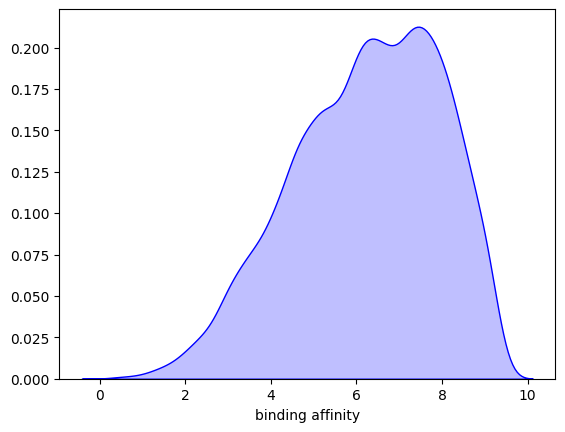

In [113]:
# 시각화
# 밀도 함수
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df.iloc[:, -1],color='blue', fill = True)
plt.ylabel('')

plt.savefig(f'density_{df_name}.png', dpi = 300, bbox_inches = 'tight')
plt.show()

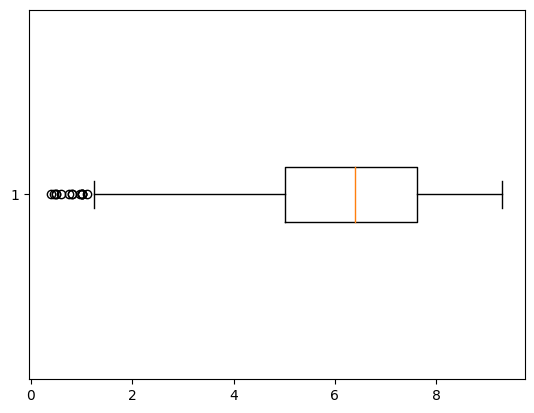

In [114]:
# 박스플랏
plt.boxplot(df.iloc[:, -1],  vert=False)

plt.savefig(f'boxplot_{df_name}.png', dpi = 300, bbox_inches = 'tight')
plt.show()